### IMPORT MODULES

In [1]:
import numpy as np
import pandas as pd
import math
import sys, os
sys.path.append(os.path.abspath(os.path.join('../scripts/')))
from clean_dataframe import CleanTelco
from plot_dataframe import PlotDataFrame

In [2]:
#Initialize Plot helper
my_plt = PlotDataFrame()
#Load data
df_telco = pd.read_csv("../data/cleaned_telco_data.csv")
df_telco

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


### Univariant Analysis

#### Dur (ms)

In [38]:
df_telco_clean[['Dur (ms)']].describe()

,Dur (ms)
count,1.468870e+05
mean,1.001894e+08
std,5.898822e+07
min,7.142988e+06
25%,5.852686e+07
50%,8.639999e+07
75%,1.331594e+08
max,2.451082e+08


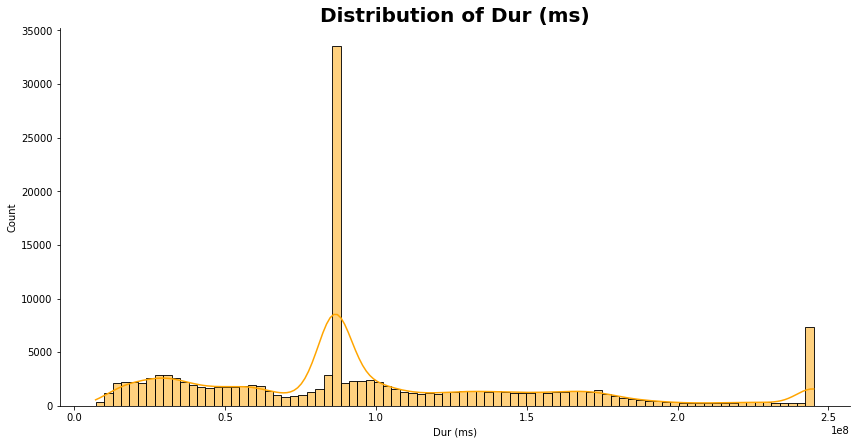

In [39]:
my_plt.hist(df_telco_clean, 'Dur (ms)', 'orange')

#### Handset Manufacturer

In [40]:
df_hand_set_man_counts = df_telco_clean['Handset Manufacturer'].value_counts()
df_hand_set_man_counts

Apple                                    59069
Samsung                                  39902
Huawei                                   33754
unknown                                   8820
Sony Mobile Communications Ab              925
                                         ...  
Sintave Technology (Group) Co Ltd            1
ZyXEL Communications Corp                    1
Shenzhen Sprocomm Technologies Co Ltd        1
Hewlett-Packard                              1
Shenzhen Gaoxinqi                            1
Name: Handset Manufacturer, Length: 168, dtype: Int64

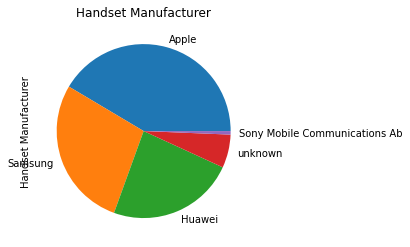

In [41]:
df_hand_set_man_counts.head(5).plot(kind='pie',  title="Handset Manufacturer");

#### Handset Type

In [42]:
df_hand_set_type_counts = df_telco_clean['Handset Type'].value_counts()
df_hand_set_type_counts

Huawei B528S-23A                             19373
Apple iPhone 6S (A1688)                       9369
Apple iPhone 6 (A1586)                        8967
unknown                                       8820
Apple iPhone 7 (A1778)                        6240
                                             ...  
Tcl Communicatio. Alcatel Pop4 6 4G 7070X        1
Lenovo Moto C                                    1
Fully Holdings (. Oukitel C2                     1
Lenovo Moto G (5Th Gen) Da12936945               1
Shenzhen Jeko Co. Blackview Bv5800 Pro           1
Name: Handset Type, Length: 1363, dtype: Int64

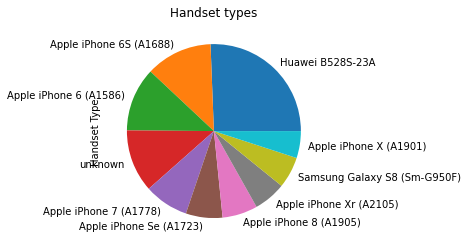

In [43]:
# my_plt.plotly_pie(df_telco_clean, 'Handset Type', 10)
df_hand_set_type_counts.head(10).plot(kind='pie',  title="Handset types");

#### Youtube Data Volume

In [44]:
df_telco_clean[['Youtube Data Volume (Bytes)']].describe()

,Youtube Data Volume (Bytes)
count,1.468870e+05
mean,2.264198e+07
std,9.244659e+06
min,1.296550e+05
25%,1.599692e+07
50%,2.266341e+07
75%,2.929351e+07
max,4.519008e+07


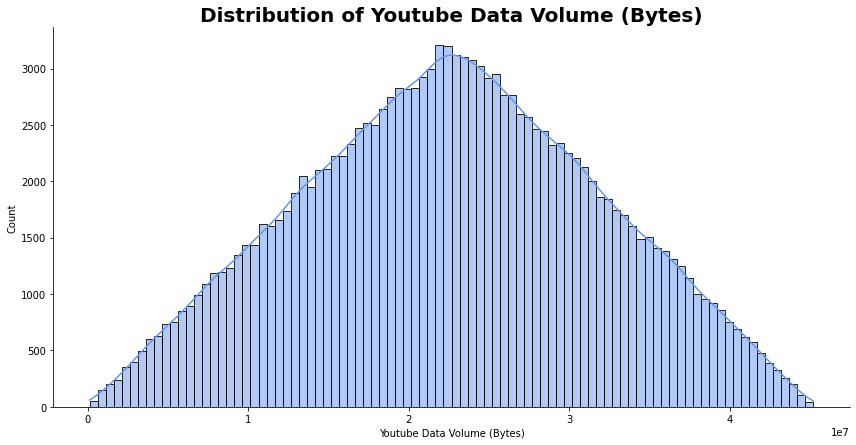

In [45]:
my_plt.hist(df_telco_clean, 'Youtube Data Volume (Bytes)')

#### Netflix Data Volume

In [46]:
df_telco_clean[['Netflix Data Volume (Bytes)']].describe()


,Netflix Data Volume (Bytes)
count,1.468870e+05
mean,2.262923e+07
std,9.259113e+06
min,9.843200e+04
25%,1.598200e+07
50%,2.263459e+07
75%,2.928806e+07
max,4.519815e+07


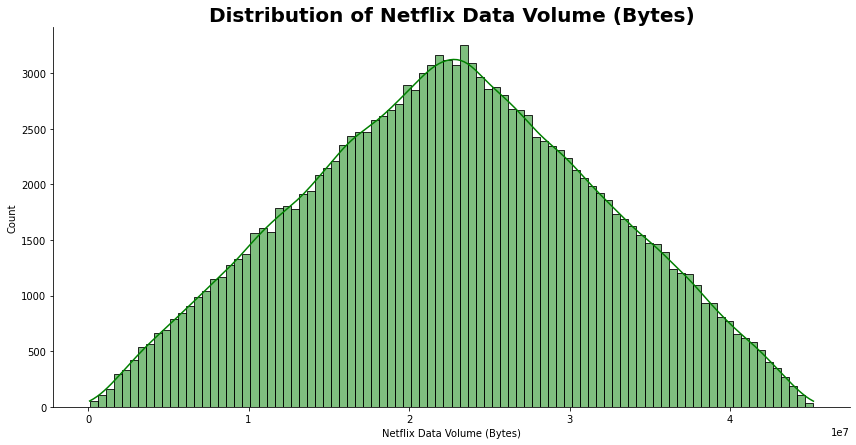

In [47]:
my_plt.hist(df_telco_clean, 'Netflix Data Volume (Bytes)', 'green')


#### Gaming Data Volume

In [48]:
df_telco_clean[['Gaming Data Volume (Bytes)']].describe()

,Gaming Data Volume (Bytes)
count,1.468870e+05
mean,4.303526e+08
std,2.440925e+08
min,3.063580e+05
25%,2.186904e+08
50%,4.316603e+08
75%,6.415752e+08
max,8.592028e+08


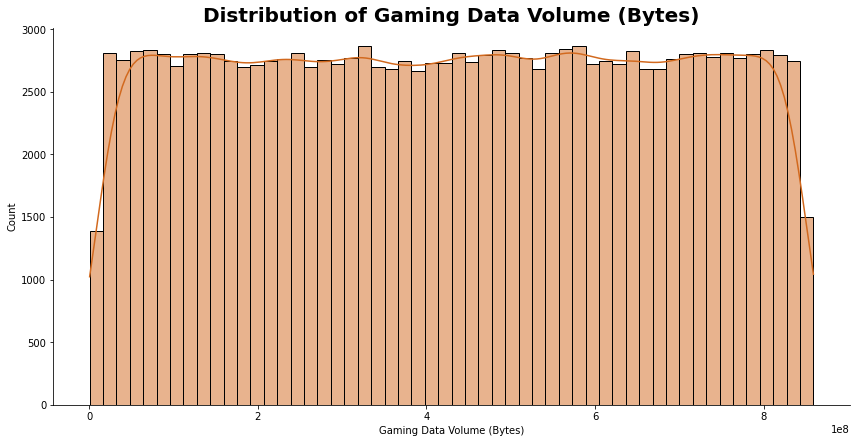

In [49]:
my_plt.hist(df_telco_clean, 'Gaming Data Volume (Bytes)', 'chocolate')

#### Email Data Volume

In [50]:
df_telco_clean[['Email Data Volume (Bytes)']].describe()

,Email Data Volume (Bytes)
count,1.468870e+05
mean,2.259087e+06
std,1.071133e+06
min,8.359000e+03
25%,1.359012e+06
50%,2.263890e+06
75%,3.159616e+06
max,4.518036e+06


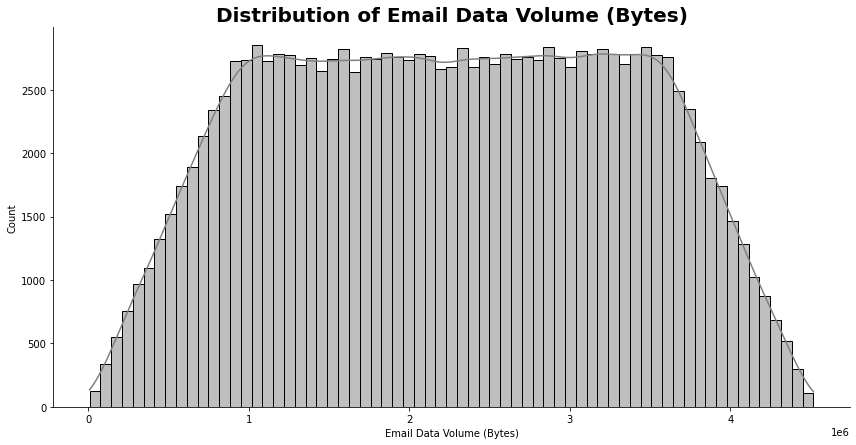

In [51]:
my_plt.hist(df_telco_clean, 'Email Data Volume (Bytes)', 'grey')


#### Google Data Volume

In [52]:
df_telco_clean[['Google Data Volume (Bytes)']].describe()


,Google Data Volume (Bytes)
count,1.468870e+05
mean,7.807976e+06
std,3.517132e+06
min,4.033000e+04
25%,4.943585e+06
50%,7.815531e+06
75%,1.068314e+07
max,1.552878e+07


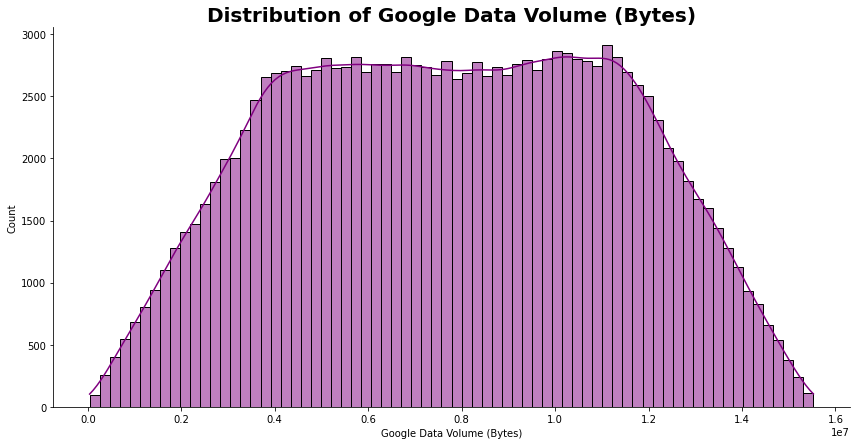

In [53]:
my_plt.hist(df_telco_clean, 'Google Data Volume (Bytes)', 'purple')


#### Social Media Data Volume

In [54]:
df_telco_clean[['Social Media Data Volume (Bytes)']].describe()

,Social Media Data Volume (Bytes)
count,1.468870e+05
mean,1.827736e+06
std,1.035571e+06
min,1.563000e+03
25%,9.313390e+05
50%,1.825390e+06
75%,2.727156e+06
max,3.650861e+06


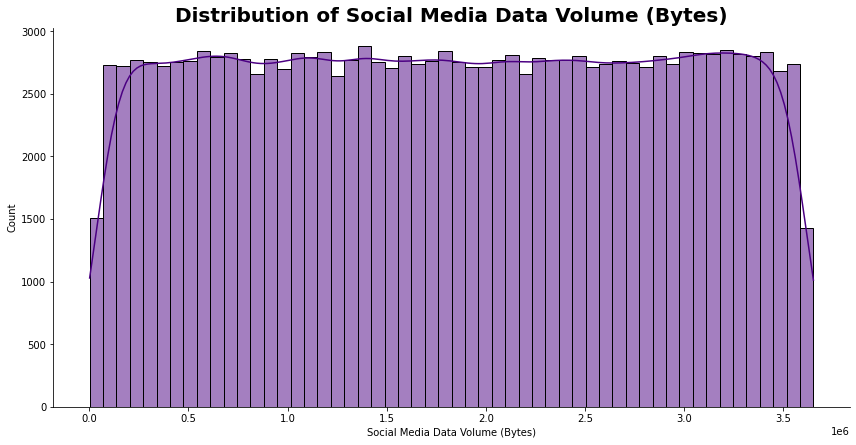

In [55]:
my_plt.hist(df_telco_clean, 'Social Media Data Volume (Bytes)', 'indigo')

#### Other Data Volume

In [56]:
df_telco_clean[['Other Data Volume (Bytes)']].describe()


,Other Data Volume (Bytes)
count,1.468870e+05
mean,4.292669e+08
std,2.432060e+08
min,1.490450e+05
25%,2.184772e+08
50%,4.297978e+08
75%,6.396625e+08
max,8.595209e+08


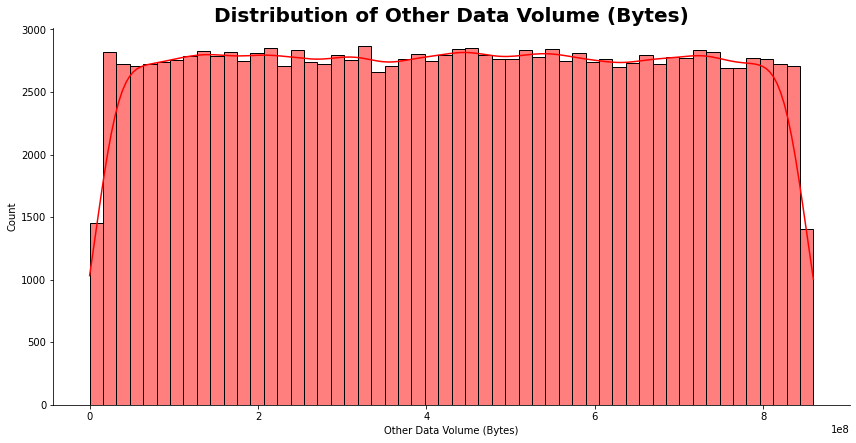

In [57]:
my_plt.hist(df_telco_clean, 'Other Data Volume (Bytes)', 'red')


#### Total Volume

In [58]:
df_telco_clean[['Total Data Volume (Bytes)']].describe()

,Total Data Volume (Bytes)
count,1.468870e+05
mean,4.957815e+08
std,2.444434e+08
min,2.895611e+07
25%,2.844777e+08
50%,4.969362e+08
75%,7.066379e+08
max,9.536316e+08


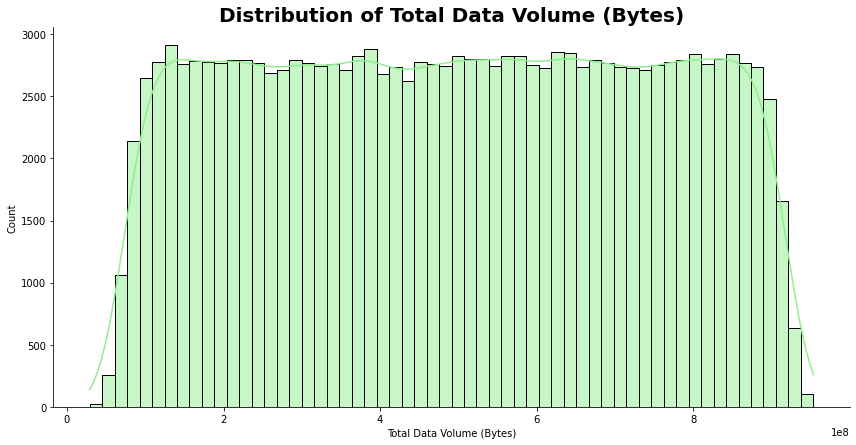

In [59]:
my_plt.hist(df_telco_clean, 'Total Data Volume (Bytes)', 'lightgreen')


### Bivariate Analysis

#### Youtube Data Volume Vs Total Data Volume

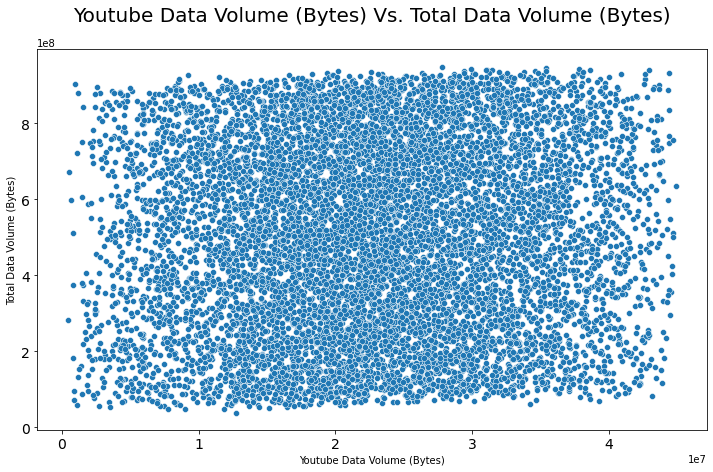

In [60]:
my_plt.scatter(df_telco_clean.sample(10000), 'Youtube Data Volume (Bytes)', 'Total Data Volume (Bytes)')

#### Netflix Data Volume Vs Total Data Volume 

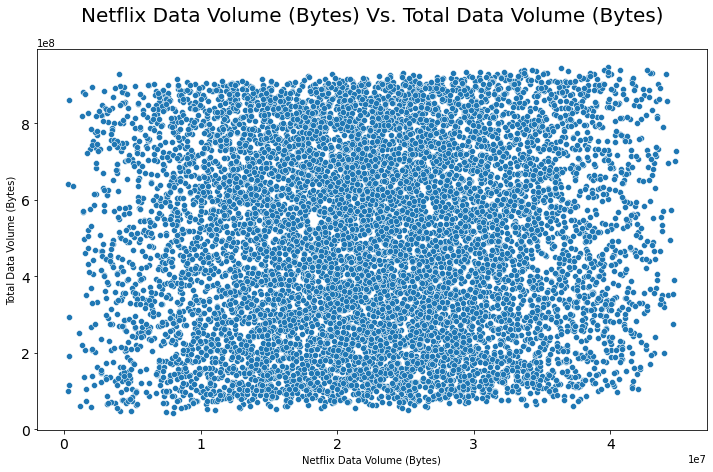

In [61]:
my_plt.scatter(df_telco_clean.sample(10000), 'Netflix Data Volume (Bytes)', 'Total Data Volume (Bytes)')

#### Gaming Data Volume Vs Total Data Volume

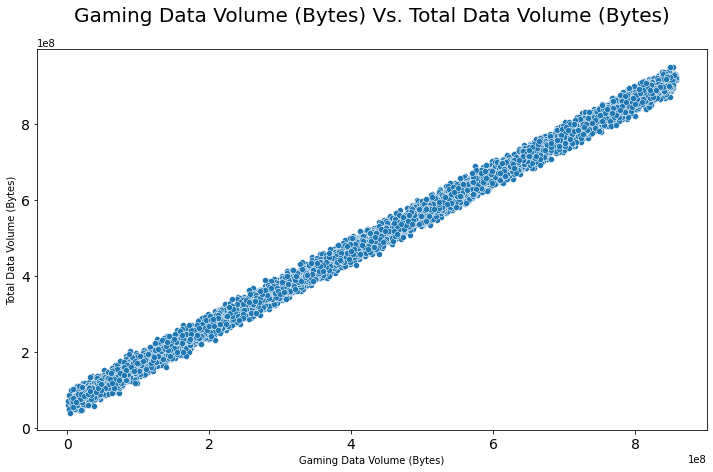

In [62]:
my_plt.scatter(df_telco_clean.sample(10000), 'Gaming Data Volume (Bytes)', 'Total Data Volume (Bytes)')

#### Email Data Volume Vs Total Data Volume

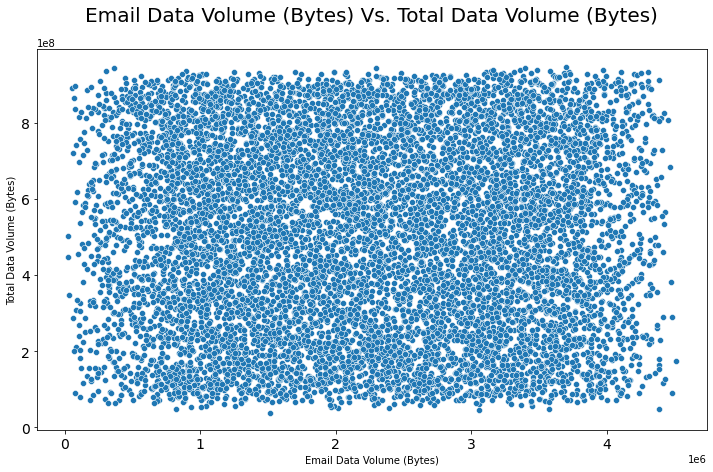

In [63]:
my_plt.scatter(df_telco_clean.sample(10000), 'Email Data Volume (Bytes)', 'Total Data Volume (Bytes)')

#### Google Data Volume Vs Total Data Volume 

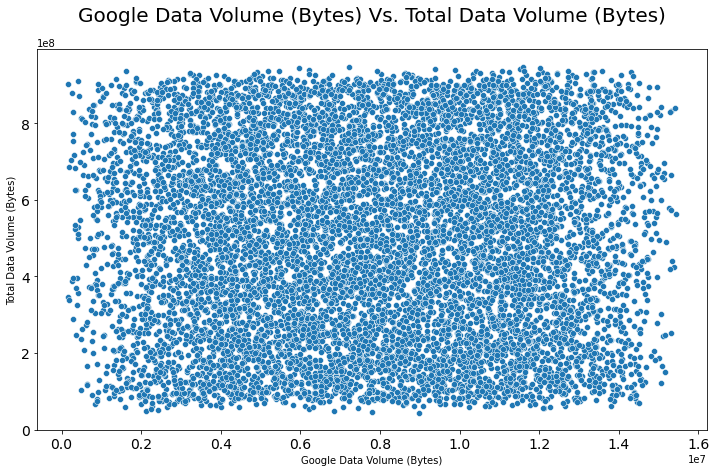

In [64]:
my_plt.scatter(df_telco_clean.sample(10000), 'Google Data Volume (Bytes)', 'Total Data Volume (Bytes)')

#### Social Media Data Volume Vs Total Data Volume 

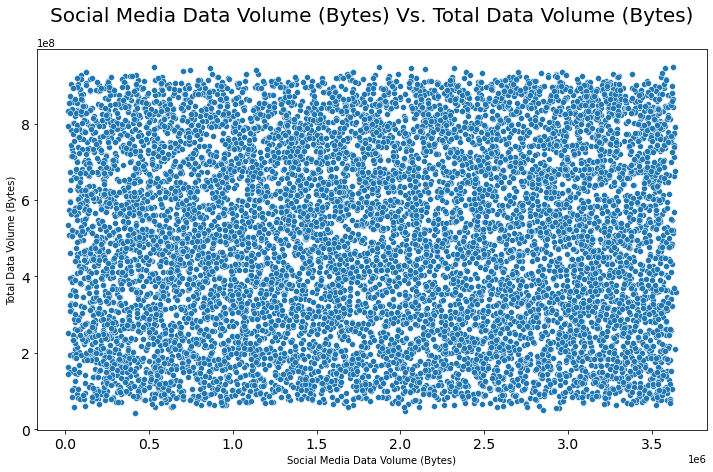

In [65]:
my_plt.scatter(df_telco_clean.sample(10000), 'Social Media Data Volume (Bytes)', 'Total Data Volume (Bytes)')

#### Other Data Volume Vs Total Data Volume 

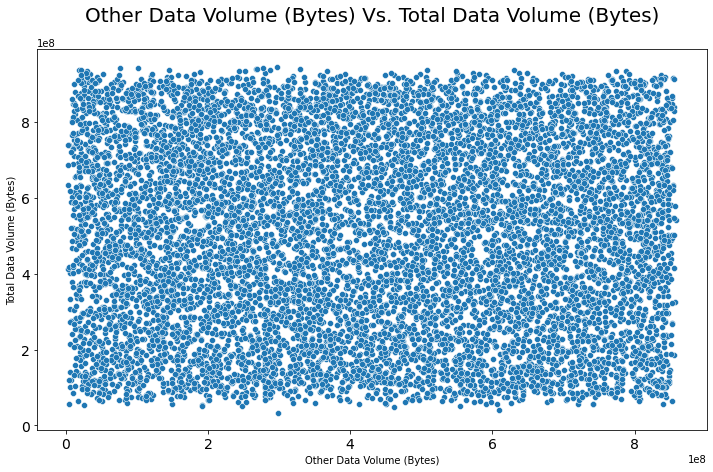

In [66]:
my_plt.scatter(df_telco_clean.sample(10000), 'Other Data Volume (Bytes)', 'Total Data Volume (Bytes)')


### Correlation Analysis

In [67]:
df_corr = df_telco_clean[[
    'Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)', 'Email Data Volume (Bytes)',
    'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)', 'Gaming Data Volume (Bytes)',
    'Other Data Volume (Bytes)']
].corr()
df_corr

,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes)
Social Media Data Volume (Bytes),1.000000,-0.001933,0.004208,0.000570,0.001354,0.001894,0.005561
Google Data Volume (Bytes),-0.001933,1.000000,-0.000036,0.002172,-0.002018,-0.000800,-0.001268
Email Data Volume (Bytes),0.004208,-0.000036,1.000000,-0.003430,0.001518,0.000071,-0.000801
Youtube Data Volume (Bytes),0.000570,0.002172,-0.003430,1.000000,0.003604,-0.003674,0.003250
Netflix Data Volume (Bytes),0.001354,-0.002018,0.001518,0.003604,1.000000,-0.003546,-0.007924
Gaming Data Volume (Bytes),0.001894,-0.000800,0.000071,-0.003674,-0.003546,1.000000,-0.002814
Other Data Volume (Bytes),0.005561,-0.001268,-0.000801,0.003250,-0.007924,-0.002814,1.000000


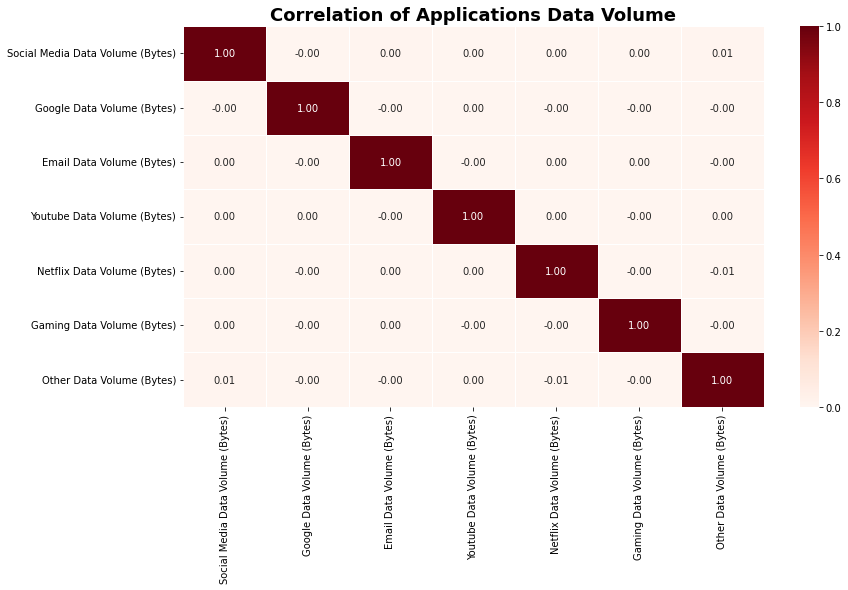

In [68]:
my_plt.heatmap(df_corr, "Correlation of Applications Data Volume")
#We can conclude that no correlation exist among the data usage applications

#### Handset Analysis

In [69]:
df_telco_clean['Handset Type'].value_counts().head(10)

Huawei B528S-23A                19373
Apple iPhone 6S (A1688)          9369
Apple iPhone 6 (A1586)           8967
unknown                          8820
Apple iPhone 7 (A1778)           6240
Apple iPhone Se (A1723)          5150
Apple iPhone 8 (A1905)           4961
Apple iPhone Xr (A2105)          4542
Samsung Galaxy S8 (Sm-G950F)     4404
Apple iPhone X (A1901)           3788
Name: Handset Type, dtype: Int64

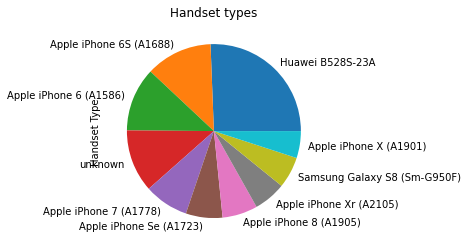

In [70]:
df_telco_clean['Handset Type'].value_counts().head(10).plot(kind='pie',  title="Handset types");

#### Handset Manufacturers

In [71]:
df_top_3_manf = df_telco_clean[['Handset Manufacturer']].value_counts().head(3)
df_top_3_manf

Handset Manufacturer
Apple                   59069
Samsung                 39902
Huawei                  33754
dtype: int64

<AxesSubplot:title={'center':'Top Handset Manufacturer'}, ylabel='None'>

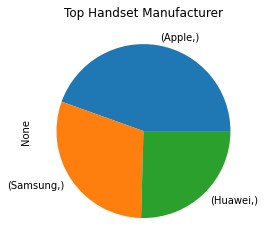

In [72]:
 df_telco_clean[['Handset Manufacturer']].value_counts().head(3).plot(kind='pie', title="Top Handset Manufacturer")

#### Top 5 Handsets of the top 3 Handset Manufacturers

In [73]:
df_top_3_manf = df_telco_clean['Handset Manufacturer'].value_counts().head(3)
df_top_3_manf

Apple      59069
Samsung    39902
Huawei     33754
Name: Handset Manufacturer, dtype: Int64

In [74]:
# Get top handsets of top handset manufacturers
df_top_3_manf = df_telco_clean[df_telco_clean["Handset Manufacturer"].isin(df_top_3_manf.index.tolist())]
top_handsets = df_top_3_manf['Handset Type'].groupby(df_telco_clean['Handset Manufacturer']).apply(lambda x: x.value_counts().head(5))
top_handsets

Handset Manufacturer                                
Apple                 Apple iPhone 6S (A1688)            9369
                      Apple iPhone 6 (A1586)             8967
                      Apple iPhone 7 (A1778)             6240
                      Apple iPhone Se (A1723)            5150
                      Apple iPhone 8 (A1905)             4961
Huawei                Huawei B528S-23A                  19373
                      Huawei E5180                       2062
                      Huawei P20 Lite Huawei Nova 3E     2000
                      Huawei P20                         1471
                      Huawei Y6 2018                      984
Samsung               Samsung Galaxy S8 (Sm-G950F)       4404
                      Samsung Galaxy A5 Sm-A520F         3673
                      Samsung Galaxy J5 (Sm-J530)        3664
                      Samsung Galaxy J3 (Sm-J330)        3431
                      Samsung Galaxy S7 (Sm-G930X)       3106
Name: Handset Typ

#### Number of xDR sessions of per user

In [75]:
number_of_xdr = df_telco_clean.groupby('MSISDN/Number')['MSISDN/Number'].agg('count').reset_index(name='Bearer Id').sort_values(by='Bearer Id',
        ascending=False)

number_of_xdr.rename(columns={number_of_xdr.columns[1]: 'number of xDR sessions'}, inplace=True)
number_of_xdr

,MSISDN/Number,number of xDR sessions
13379,33626320676,18
13035,33625779332,17
6353,33614892860,17
36666,33659725664,16
75561,33675877202,15
...,...,...
40613,33660669493,1
40612,33660669025,1
40610,33660668320,1
40609,33660668134,1


#### Average session duration per user

In [76]:
session_duration_per_user = df_telco_clean.groupby('MSISDN/Number').agg({'Dur (ms)': 'mean'})
session_duration_per_user.rename(
        columns={'Dur (ms)': 'Average session duration (ms)'}, inplace=True)
session_duration_per_user.sort_values(by=['Average session duration (ms)'], ascending=False).head(10)

,Average session duration (ms)
MSISDN/Number,
337000037000919,245108160.5
33762185850,245108160.5
33762190964,245108160.5
33667099979,245108160.5
33762199147,245108160.5
33667078134,245108160.5
33667077911,245108160.5
33762213743,245108160.5
33646337581,245108160.5


#### Total Data Volume Analysis

In [77]:
total_data = df_telco_clean.groupby('MSISDN/Number')[[ 'Total UL (Bytes)', 'Total DL (Bytes)', 'Total Data Volume (Bytes)']].sum()
total_data.nlargest(10, 'Total Data Volume (Bytes)')

,Total UL (Bytes),Total DL (Bytes),Total Data Volume (Bytes)
MSISDN/Number,,,
33614892860,689483001.0,8.156743e+09,8.846226e+09
33760536639,703478581.0,7.811295e+09,8.514774e+09
33625779332,729577380.0,7.770043e+09,8.499621e+09
33626320676,669650721.0,7.301517e+09,7.971167e+09
33675877202,581568792.0,7.309542e+09,7.891111e+09
33659725664,624260321.0,7.081602e+09,7.705863e+09
33666464084,405060976.0,6.903440e+09,7.308501e+09
33760413819,521518890.0,6.610852e+09,7.132371e+09
33664712899,471562882.0,6.400774e+09,6.872337e+09


#### Total data volumne of each application per user

In [78]:
apps_total = df_telco_clean.groupby('MSISDN/Number')[['Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)',
    'Email Data Volume (Bytes)', 'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)',
    'Gaming Data Volume (Bytes)', 'Other Data Volume (Bytes)', 'Total Data Volume (Bytes)']].sum()
apps_total.nlargest(10, 'Total Data Volume (Bytes)')

,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes)
MSISDN/Number,,,,,,,,
33614892860,28294544.0,127973787.0,40788634.0,394370218.0,361401046.0,7.749432e+09,7.639264e+09,8.846226e+09
33760536639,39783189.0,123223099.0,33693767.0,396289198.0,334643269.0,7.461045e+09,4.716134e+09,8.514774e+09
33625779332,27135500.0,142307915.0,40633966.0,452958769.0,356980607.0,7.326673e+09,6.354583e+09,8.499621e+09
33626320676,43374779.0,152191852.0,42418782.0,374483047.0,328725740.0,6.887572e+09,8.167878e+09,7.971167e+09
33675877202,19222921.0,109860502.0,31514421.0,317410572.0,309093159.0,6.970568e+09,6.798515e+09,7.891111e+09
33659725664,35412358.0,116516345.0,35999792.0,257991088.0,399519079.0,6.725559e+09,6.317415e+09,7.705863e+09
33666464084,18629986.0,89320737.0,25557139.0,227336012.0,214416926.0,6.646303e+09,4.349141e+09,7.308501e+09
33760413819,20777205.0,82738720.0,25576965.0,303169107.0,318347546.0,6.268620e+09,4.101645e+09,7.132371e+09
33664712899,19390599.0,90389372.0,21426007.0,276834013.0,251798809.0,6.103856e+09,3.976960e+09,6.872337e+09
